<a href="https://colab.research.google.com/github/KYOH95/Project_THESPORTS_CP2/blob/main/CP2_KYOH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 시행착오

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.4f}'.format

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_membership = pd.read_csv("./drive/MyDrive/CP2/data_original/membership_.csv")
df_ticket = pd.read_csv("./drive/MyDrive/CP2/data_original/reserve_ticket_.csv")
df_weather = pd.read_csv("./drive/MyDrive/CP2/data_original/weather_.csv", encoding='cp949')
df_weather_all = pd.read_csv("./drive/MyDrive/CP2/data_original/weather_all.csv", encoding='cp949')
df_game_list = pd.read_csv("./drive/MyDrive/CP2/data_original/game_list_.csv")
df_survey_complete = pd.read_csv("./drive/MyDrive/CP2/data_original/survey_complete_.csv")
df_schedule = pd.read_xml("./drive/MyDrive/CP2/data_original/schedule_.xml", encoding='cp949')

In [ ]:
# *출처 https://data.kleague.com/ (순위표, 관중수)
# http://data.prosports.or.kr/spectator/m21/main 관중수

df_new_game_list = df_game_list[['game_date','yoil','game_time','game_type_name','audience']]
df_new_game_list['weekend'] = np.where((df_new_game_list['yoil'] == '토') | (df_new_game_list['yoil'] == '일'), 1, 0)
df_new_game_list['home'] = np.where((df_game_list['home_team_name'] == '인천'), 1, 0)
df_new_game_list['opponent'] = np.where(df_game_list['home_team_name'] == '인천', df_game_list['away_team_name'], df_game_list['home_team_name'])
#각 팀별로 평균 방문자 수를 두어서 가중치 차별화를 해야할 듯
df_new_game_list["home_avg_audience"] = np.where(df_new_game_list['home'] == 1, 5261, 0)
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "서울"),"home_avg_audience"] = 8786
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "울산"),"home_avg_audience"] = 8742
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "대구"),"home_avg_audience"] = 6411
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "전북"),"home_avg_audience"] = 6017
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "수원"),"home_avg_audience"] = 5850
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "인천"),"home_avg_audience"] = 5261
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "포항"),"home_avg_audience"] = 4776
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "수원fc"),"home_avg_audience"] = 3162
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "제주"),"home_avg_audience"] = 3151
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "강원"),"home_avg_audience"] = 2165
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "성남"),"home_avg_audience"] = 1890
df_new_game_list.loc[(df_new_game_list["home_avg_audience"]==0) & (df_new_game_list["opponent"] == "김천"),"home_avg_audience"] = 1520
df_new_game_list = df_new_game_list.sort_values(by=["game_date"],ascending=True)
#테이블에 당시 현재 순위 등록 필요 (수기로 넣어도 될듯)
df_new_game_list['IU_current_rank'] =   [1,4,5,2,7,4,2,2,2,2,2,4,3,4,5,5,5,4,5,5,5,5,5,5,5,4,5,4,4,4,4,4,4,4,4,4,4,4]
df_new_game_list['opp_current_rank'] = [1,8,3,3,4,12,1,6,6,7,6,1,8,5,12,3,11,7,11,8,2,10,12,7,9,2,3,7,7,5,9,1,11,1,5,6,3,2]


df_new_game_list['last_game']  = ['D','W','D','W','L','L','W','D','W','W','D','W','D','L','L','W','L','L','L','D','W','L','L','L','L','W','L','D','W','D','L','D','L','L','W','D','W','W']
df_new_game_list['last_goal_diff'] = [0,1,0,1,1,2,1,0,1,1,0,2,0,1,2,2,1,1,3,0,1,1,1,2,1,1,5,0,2,0,1,0,1,0,1,0,2,1]
df_new_game_list['last_goal_sum'] = [0,1,0,1,1,4,1,0,3,5,4,4,4,1,2,2,3,3,3,0,1,5,5,4,3,5,5,2,2,4,1,6,3,3,3,0,4,3]
df_new_game_list['last_5win'] = [1,1,3,2,2,0,2,2,3,3,2,3,1,1,0,3,1,1,0,2,4,1,0,1,0,3,2,2,3,2,3,2,1,1,3,0,1,4]       

df_new_game_list["location"] = np.where(df_new_game_list['home'] == 1, "인천", df_new_game_list['opponent'])
df_new_game_list.loc[df_new_game_list["location"] == "성남","location"] = "서울"
df_new_game_list.loc[df_new_game_list["location"] == "수원fc","location"] = "수원"
df_new_game_list.loc[df_new_game_list["location"] == "강원","location"] = "강릉"
df_new_game_list.loc[df_new_game_list["location"] == "김천","location"] = "구미"
df_new_game_list.loc[df_new_game_list["location"] == "전북","location"] = "전주"
df_new_game_list.loc[df_new_game_list["location"] == "제주","location"] = "서귀포"

df_new_game_list['game_date'] = pd.to_datetime(df_new_game_list['game_date'])

In [ ]:
df_new_game_list

,game_date,yoil,game_time,game_type_name,audience,weekend,home,opponent,home_avg_audience,IU_current_rank,opp_current_rank,last_game,last_goal_diff,last_goal_sum,last_5win,location
0,2022-02-19,토,16:30,스플릿일반,5382,1,1,수원,5261,1,1,D,0,0,1,인천
1,2022-02-26,토,14:00,스플릿일반,4618,1,1,서울,5261,4,8,W,1,1,1,인천
2,2022-03-01,화,16:30,스플릿일반,1559,0,0,강원,2165,5,3,D,0,0,3,강릉
3,2022-03-05,토,19:00,스플릿일반,3581,1,1,포항,5261,2,3,W,1,1,2,인천
4,2022-03-13,일,14:00,스플릿일반,2607,1,1,김천,5261,7,4,L,1,1,2,인천
5,2022-03-20,일,19:00,스플릿일반,1361,1,0,성남,1890,4,12,L,2,4,0,서울
6,2022-04-02,토,14:00,스플릿일반,7054,1,1,울산,5261,2,1,W,1,1,2,인천
7,2022-04-05,화,19:30,스플릿일반,3009,0,0,대구,6411,2,6,D,0,0,2,대구
8,2022-04-10,일,16:30,스플릿일반,5234,1,1,제주,5261,2,6,W,1,3,3,인천
9,2022-05-05,목,19:00,스플릿일반,3794,0,0,수원fc,3162,2,7,W,1,5,3,수원


In [ ]:
df_new_weather = df_weather_all[["지점명","일시","평균기온(°C)","일강수량(mm)","평균 풍속(m/s)","평균 상대습도(%)"]]
df_new_weather.rename(columns = {"지점명":"location",'일시':'game_date','평균기온(°C)':'temperature', '일강수량(mm)':'precipitation','평균 풍속(m/s)':'wind_speed','평균 상대습도(%)':'humidity'}, inplace = True)
df_new_weather = df_new_weather.fillna(0)
df_new_weather['game_date'] = pd.to_datetime(df_new_weather['game_date'])
df_new_weather

,location,game_date,temperature,precipitation,wind_speed,humidity
0,강릉,2022-02-01,2.1000,0.0000,3.2000,46.1000
1,강릉,2022-02-02,0.9000,0.0000,4.0000,37.8000
2,강릉,2022-02-03,0.7000,0.0000,3.1000,32.6000
3,강릉,2022-02-04,-1.0000,0.0000,3.4000,30.4000
4,강릉,2022-02-05,-3.5000,0.0000,4.0000,32.8000
...,...,...,...,...,...,...
2725,구미,2022-10-27,13.2000,0.0000,0.4000,63.9000
2726,구미,2022-10-28,12.7000,0.0000,0.4000,70.9000
2727,구미,2022-10-29,12.9000,0.0000,0.3000,72.3000
2728,구미,2022-10-30,12.9000,0.0000,0.5000,71.3000


In [ ]:
df_new_game_list = pd.merge(df_new_game_list, df_new_weather, how="left", on=["game_date","location"])
df_new_game_list.set_index(["game_date"])
df_new_game_list.to_csv('game_list_updated.csv', index=False)
df_new_game_list = df_new_game_list.drop(axis = 1, columns = ["yoil","game_time","location"])   

In [ ]:
# update dataframe for modeling

df_new_game_list.head(5)

,game_date,game_type_name,audience,weekend,home,opponent,home_avg_audience,IU_current_rank,opp_current_rank,last_game,last_goal_diff,last_goal_sum,last_5win,temperature,precipitation,wind_speed,humidity
0,2022-02-19,스플릿일반,5382,1,1,수원,5261,1,1,D,0,0,1,-1.7000,0.0000,3.7000,56.3000
1,2022-02-26,스플릿일반,4618,1,1,서울,5261,4,8,W,1,1,1,4.1000,0.5000,5.5000,80.6000
2,2022-03-01,스플릿일반,1559,0,0,강원,2165,5,3,D,0,0,3,10.0000,0.0000,2.8000,49.3000
3,2022-03-05,스플릿일반,3581,1,1,포항,5261,2,3,W,1,1,2,2.0000,0.0000,4.9000,36.8000
4,2022-03-13,스플릿일반,2607,1,1,김천,5261,7,4,L,1,1,2,10.0000,32.8000,2.4000,95.5000


### train_test_split

In [ ]:
# train set, validation set, test set
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = df_new_game_list

X = df.drop(columns=["audience","game_date","game_type_name"])
y = df["audience"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (26, 14)
y_train shape:  (26,)
X_test shape:  (12, 14)
y_test shape:  (12,)


In [ ]:
X_train.head()

,weekend,home,opponent,home_avg_audience,IU_current_rank,opp_current_rank,last_game,last_goal_diff,last_goal_sum,last_5win,temperature,precipitation,wind_speed,humidity
14,1,1,성남,5261,5,12,L,2,2,0,20.0000,0.0000,2.7000,74.0000
19,0,1,수원fc,5261,5,8,D,0,0,2,29.0000,0.0000,2.0000,72.5000
32,1,0,김천,1520,4,11,L,1,3,1,26.2000,0.0000,0.8000,75.3000
23,0,1,수원fc,5261,5,7,L,2,4,1,26.3000,51.1000,3.4000,94.6000
31,0,1,울산,5261,4,1,D,0,6,2,24.4000,0.0000,4.2000,55.3000


### 1. Baseline Model

mean:  5278.368421052632
median:  4348.5


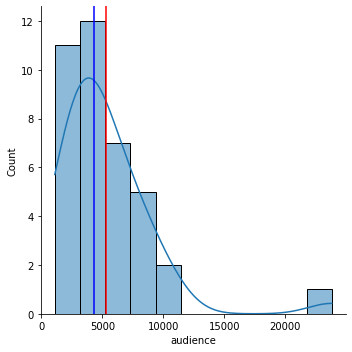

In [ ]:
## Baseline Graph
audience_mean = y_train.mean()

## audience
sns.displot(df['audience'], kde=True)

## draw mean value and median value
plt.axvline(df['audience'].mean(), color='red')
plt.axvline(df['audience'].median(), color='blue');
print("mean: ", df['audience'].mean())
print("median: ", df['audience'].median())

In [ ]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

audience_mean = y_train.mean()
y_pred_baseline = [audience_mean] * len(y_test)

mse = mean_squared_error(y_pred_baseline, y_test)
mae = mean_absolute_error(y_pred_baseline, y_test)
rmse = mse ** 0.5
r2 = r2_score(y_pred_baseline, y_test)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,9370501.0049
1,MAE,2651.8718
2,RMSE,3061.1274
3,R2,0.0000


### 2. Multiple Linear Regression

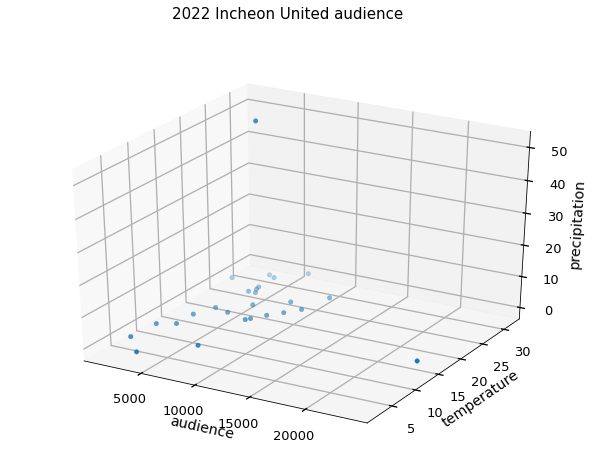

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter( y_train, X_train['temperature'], X_train['precipitation'])
ax.set_xlabel('audience', labelpad=10)
ax.set_ylabel('temperature', labelpad=10)
ax.set_zlabel('precipitation', labelpad=10)

plt.suptitle('2022 Incheon United audience', fontsize=15)
plt.show()

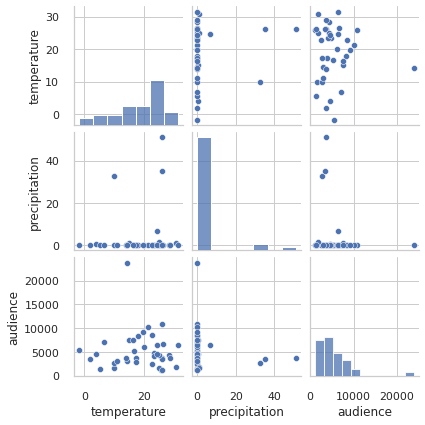

In [ ]:
# Compare 3 important features: avg temperature, precipitation, and audience
sns.set(style='whitegrid', context='notebook')
cols = ['temperature', 'precipitation', 'audience']
sns.pairplot(df[cols], height=2);

In [ ]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression
multiple_linear_model = LinearRegression()

# Select features
features = ["temperature", "precipitation"]

X_train_mlinear = X_train[features]
X_test_mlinear = X_test[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# test set
y_pred_val_linear = multiple_linear_model.predict(X_test_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_pred_val_linear, y_test)
mae = mean_absolute_error(y_pred_val_linear, y_test)
rmse = mse ** 0.5
r2 = r2_score(y_pred_val_linear,y_test)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,8778789.4281
1,MAE,2392.9581
2,RMSE,2962.9022
3,R2,-18.7604


y = 5727 + 23.3123x₁ + -50.6490x₂


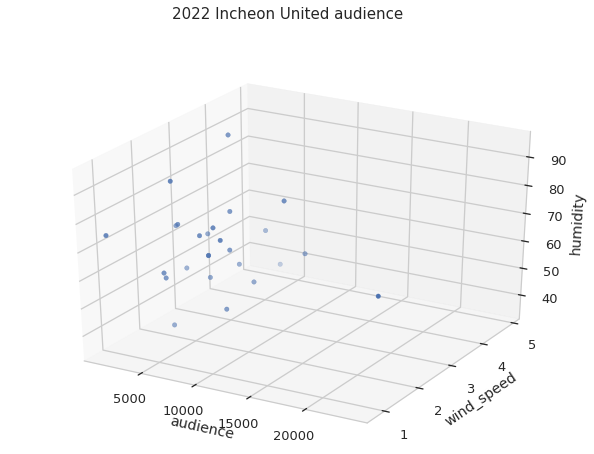

In [ ]:
#multi-linear regression: wind speed & humidity
style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter( y_train, X_train['wind_speed'], X_train['humidity'])
ax.set_xlabel('audience', labelpad=10)
ax.set_ylabel('wind_speed', labelpad=10)
ax.set_zlabel('humidity', labelpad=10)

plt.suptitle('2022 Incheon United audience', fontsize=15)
plt.show()

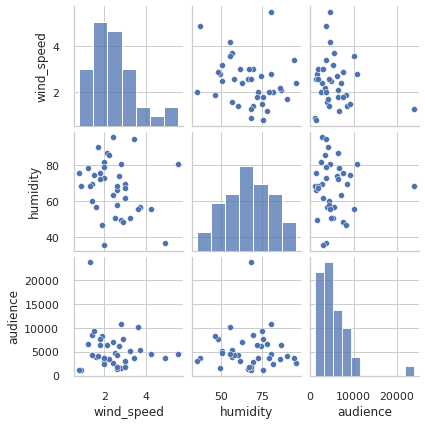

In [ ]:
# Compare 3 important features: avg temperature, precipitation, and audience
sns.set(style='whitegrid', context='notebook')
cols = ['wind_speed', 'humidity', 'audience']
sns.pairplot(df[cols], height=2);

In [ ]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression

multiple_linear_model = LinearRegression()

# Select features
features = ["wind_speed", "humidity"]

X_train_mlinear = X_train[features]
X_test_mlinear = X_test[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# test set
y_pred_val_linear = multiple_linear_model.predict(X_test_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_pred_val_linear, y_test)
mae = mean_absolute_error(y_pred_val_linear, y_test)
rmse = mse ** 0.5
r2 = r2_score(y_pred_val_linear,y_test)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,11580929.1154
1,MAE,2890.1852
2,RMSE,3403.0764
3,R2,-9.7410


y = 6869 + -855.4935x₁ + 20.1194x₂


y = 6164.4 + -47.227x₁


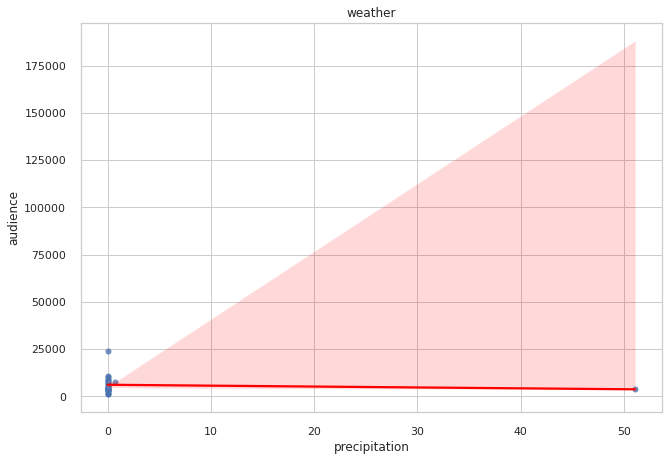

In [ ]:
#Make linear regression for checking coefficient about mileage and price
import seaborn as sns
import numpy as np

linear_model = LinearRegression()
X_train_linear = X_train[["precipitation"]]
linear_model.fit(X_train_linear, y_train)

## Coefficient or parameters
b0 = linear_model.intercept_
b1 = float(linear_model.coef_)

print(f'y = {b0:.1f} + {b1:.3f}x\u2081')

sns.regplot(x=X_train_linear, y=y_train, line_kws={"color": "red"}).set_title('weather');

In [ ]:
# ordinal encoder and standard scaler
!pip install category_encoders

# from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
# ord_enc = OrdinalEncoder(handle_missing="value")
ord_enc = OrdinalEncoder()
scaler = StandardScaler()

X_train_ord_enc = ord_enc.fit_transform(X_train)
X_test_ord_enc = ord_enc.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_ord_enc)
X_test_scaled = scaler.transform(X_test_ord_enc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 675 kB/s 


In [ ]:
X_train_ord_enc.head()

,weekend,home,opponent,home_avg_audience,IU_current_rank,opp_current_rank,last_game,last_goal_diff,last_goal_sum,last_5win,temperature,precipitation,wind_speed,humidity
14,1,1,1,5261,5,12,1,2,2,0,20.0000,0.0000,2.7000,74.0000
19,0,1,2,5261,5,8,2,0,0,2,29.0000,0.0000,2.0000,72.5000
32,1,0,3,1520,4,11,1,1,3,1,26.2000,0.0000,0.8000,75.3000
23,0,1,2,5261,5,7,1,2,4,1,26.3000,51.1000,3.4000,94.6000
31,0,1,4,5261,4,1,2,0,6,2,24.4000,0.0000,4.2000,55.3000


1 features
Selected names:  Index(['home_avg_audience'], dtype='object')
Test MAE: 1,660
Test R2: -0.4499268552962614 

2 features
Selected names:  Index(['weekend', 'home_avg_audience'], dtype='object')
Test MAE: 1,730
Test R2: -0.44571953769727646 

3 features
Selected names:  Index(['weekend', 'home_avg_audience', 'last_5win'], dtype='object')
Test MAE: 1,989
Test R2: -1.3083639098035276 

4 features
Selected names:  Index(['weekend', 'home_avg_audience', 'opp_current_rank', 'last_5win'], dtype='object')
Test MAE: 2,130
Test R2: -1.4723992029336488 

5 features
Selected names:  Index(['weekend', 'opponent', 'home_avg_audience', 'opp_current_rank',
       'last_5win'],
      dtype='object')
Test MAE: 2,245
Test R2: -1.6553730598943535 

6 features
Selected names:  Index(['weekend', 'opponent', 'home_avg_audience', 'opp_current_rank',
       'last_5win', 'wind_speed'],
      dtype='object')
Test MAE: 2,355
Test R2: -1.9684393855508722 

7 features
Selected names:  Index(['weekend', 'o

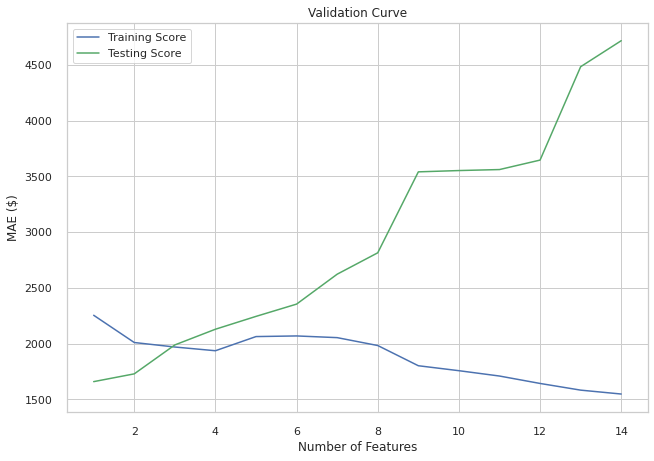

In [ ]:
# features를 몇 개 선택하는 것이 좋은지 알아 봅시다.
# MAE(mean absolute error) 평균 절대 오차

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train_ord_enc.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train_ord_enc.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_ord_enc, y_train)
    # X_val_selected = selector.transform(X_val_ord_enc)
    X_test_selected = selector.transform(X_test_ord_enc)
    
    all_names = X_train_ord_enc.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: {mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
# plt.plot(ks, testing, label= "Validating Score", color='g')
plt.plot(ks, testing, label= "Testing Score", color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [ ]:
# Tunning hyperparameters and features for Multiple_linear_model

# Select features
# features = ["home_avg_audience"]

features = ['home_avg_audience', 'opp_current_rank', 'last_5win']

# features = ['weekend', 'opponent', 'home_avg_audience', 'opp_current_rank',
#        'last_goal_sum', 'last_5win', 'temperature', 'precipitation','wind_speed']



X_train_mlinear_new = X_train_ord_enc[features]
X_test_mlinear_new = X_test_ord_enc[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear_new, y_train)

# validation set
y_pred_val_mlinear_new = multiple_linear_model.predict(X_test_mlinear_new)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred_val_mlinear_new)
mae = mean_absolute_error(y_test, y_pred_val_mlinear_new)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_val_mlinear_new)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2, b3 = multiple_linear_model.coef_
# b1,b2,b3,b4,b5,b6,b7,b8,b9 = multiple_linear_model.coef_


# print(f'y = {b1:.2f}x\u2081 + {b0:.0f}')
print(f'y = {b0:.0f} + {b1:.2f}x\u2081 + {b2:.2f}x\u2082 + {b3:.2f}x\u2083')
# print(f'y = {b0:.0f} + {b1:.2f}x\u2081 + {b2:.2f}x\u2082 + {b3:.2f}x\u2083 + {b4:.2f}x\u2084 + {b5:.2f}x\u2085 + {b6:.2f}x\u2086 + {b7:.2f}x\u2087 + {b8:.2f}x\u2088 + {b9:.2f}x\u2089')


,Metric,Score
0,MSE,5231985.4006
1,MAE,1949.1270
2,RMSE,2287.3534
3,R2,-0.6979


y = -1727 + 1.23x₁ + -81.05x₂ + 1156.68x₃


## 전처리 (2012~2022)

### 데이터 가져오기

In [ ]:
df_game = pd.read_csv("./drive/MyDrive/CP2/2010_2022_game_data/2010_2022_game_list.csv")
df_weather = pd.read_csv("./drive/MyDrive/CP2/2010_2022_game_data/2012_2020_weather.csv", encoding='cp949')
df_weather_2022 = pd.read_csv("./drive/MyDrive/CP2/2010_2022_game_data/2022_weather.csv", encoding='cp949')
df_audience = pd.read_csv("./drive/MyDrive/CP2/2010_2022_game_data/Kleague_audience.csv")
df_weather = pd.concat([df_weather,df_weather_2022])

pd.options.display.float_format = '{:.4f}'.format


### df_game 전처리

In [ ]:
#불필요한 특성 drop
df_game = df_game.drop(columns=["no_seq","meet_name","game_id","home_team_tk","away_team_tk","game_type","preview","review","game_date_timestamp","game_code","home_team_goal","away_team_goal","home_team","away_team","field_id"])
# df_game.columns

#2012~2022(스플릿 제도) 데이터 사용 
#*2020&2021 무관중으로 데이터 사용 안함
df_game.drop(df_game.loc[(df_game["meet_year"] == 2020) | (df_game["meet_year"] == 2021)].index, inplace = True)
df_game.drop(df_game.loc[(df_game["meet_year"] < 2012) | (df_game["meet_year"] > 2022)].index, inplace = True)

#결측치 제거
df_game = df_game.dropna()
df_game.info()

#1군&리그경기 제외 모두 삭제
df_game.drop(df_game.loc[df_game["meet_seq"] != 1].index, inplace = True)

#주말 경기 특성 만들기
df_game['weekend'] = np.where((df_game['yoil'] == '토') | (df_game['yoil'] == '일'), 1, 0)

#게임 타입 이름 확인
# df_game.game_type_name.unique()

#스플릿 일반, 스플릿A, 스플릿B 통일화
df_game.loc[(df_game["game_type_name"]=='스플릿a')|(df_game["game_type_name"]=='파이널a'),"game_type_name"] = '스플릿A'
df_game.loc[(df_game["game_type_name"]=='스플릿b')|(df_game["game_type_name"]=='파이널b'),"game_type_name"] = '스플릿B'
df_game.game_type_name.unique()

#무관중 경기 삭제
# df_game[df_game['audience'] == 0]
df_game.drop(df_game.loc[df_game["audience"] == 0].index, inplace = True)
df_game.shape


#날짜 형태로 변환
df_game['game_date'] = pd.to_datetime(df_game['game_date'])
# df_game.game_time.unique()

#month 특성 새로 추가
df_game["month"] = df_game["game_date"].dt.month

#경기 시간 전처리
df_game.loc[(df_game["game_time"]=='13:00:00')|(df_game["game_time"]=='13:30'),"game_time"] = '13:00'
df_game.loc[(df_game["game_time"]=='14:00:00')|(df_game["game_time"]=='13:55:00')|(df_game["game_time"]=='14:15')|(df_game["game_time"]=='14:20')|(df_game["game_time"]=='14:30'),"game_time"] = '14:00'
df_game.loc[(df_game["game_time"]=='15:00:00')|(df_game["game_time"]=='15:30:00')|(df_game["game_time"]=='15:05')|(df_game["game_time"]=='15:10')|(df_game["game_time"]=='15:20')|(df_game["game_time"]=='14:45'),"game_time"] = '15:00'
df_game.loc[(df_game["game_time"]=='16:00:00')|(df_game["game_time"]=='16:30'),"game_time"] = '16:00'
df_game.loc[(df_game["game_time"]=='17:00:00')|(df_game["game_time"]=='16:50:00')|(df_game["game_time"]=='16:40:00'),"game_time"] = '17:00'
df_game.loc[(df_game["game_time"]=='18:00:00')|(df_game["game_time"]=='17:50'),"game_time"] = '18:00'
df_game.loc[(df_game["game_time"]=='19:00:00')|(df_game["game_time"]=='19:30:00')|(df_game["game_time"]=='19:30'),"game_time"] = '19:00'
df_game.loc[(df_game["game_time"]=='20:00:00'),"game_time"] = '20:00'
# df_game.game_time.unique()


#상주상무 김천상무로 변경
df_game.loc[df_game["home_team_name"] == "상주","home_team_name"] = "김천"
df_game.loc[df_game["away_team_name"] == "상주","away_team_name"] = "김천"

#경기장 이름으로 장소 이름 변경
df_game["location"] = df_game["home_team_name"]
df_game.loc[df_game["home_team_name"] == "성남","location"] = "서울"
df_game.loc[df_game["home_team_name"] == "수원fc","location"] = "수원"
df_game.loc[df_game["home_team_name"] == "강원","location"] = "강릉"
df_game.loc[df_game["home_team_name"] == "전북","location"] = "전주"
df_game.loc[df_game["home_team_name"] == "제주","location"] = "서귀포"
df_game.loc[df_game["home_team_name"] == "전남","location"] = "광양"
df_game.loc[df_game["home_team_name"] == "경남","location"] = "창원"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3330 entries, 531 to 4036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   meet_year       3330 non-null   float64
 1   meet_seq        3330 non-null   float64
 2   game_date       3330 non-null   object 
 3   yoil            3330 non-null   object 
 4   game_time       3330 non-null   object 
 5   home_team_name  3330 non-null   object 
 6   away_team_name  3330 non-null   object 
 7   field_name      3330 non-null   object 
 8   game_type_name  3330 non-null   object 
 9   audience        3330 non-null   float64
dtypes: float64(3), object(7)
memory usage: 286.2+ KB


In [ ]:
# df_game.info()
# df_game.tail()

### df_weather 전처리

In [ ]:
#날씨 데이터 지점 명칭 바꿔주기
df_weather.loc[df_weather["지점명"] == "광양시","지점명"] = "광양"
df_weather.loc[df_weather["지점명"] == "구미","지점명"] = "김천"
df_weather.loc[df_weather["지점명"] == "상주","지점명"] = "김천"

#불필요한 데이터 버리고 필요한 데이터 특성 명칭 변경
df_weather = df_weather[["지점명","일시","평균기온(°C)","일강수량(mm)","평균 풍속(m/s)","평균 상대습도(%)"]]
df_weather.rename(columns = {"지점명":"location",'일시':'game_date','평균기온(°C)':'temperature', '일강수량(mm)':'precipitation','평균 풍속(m/s)':'wind_speed','평균 상대습도(%)':'humidity'}, inplace = True)
df_weather = df_weather.fillna(0)

#게임 날짜 데이터 "날짜" 형태로 바꿔주기
df_weather['game_date'] = pd.to_datetime(df_weather['game_date'])


#게임데이터에 날씨데이터 조인
df_game = pd.merge(df_game, df_weather, how="left", on=["game_date","location"])
# df_game.set_index(["game_date"])
# df_game.to_csv('game_list_updated.csv', index=False)
df_game = df_game.drop(axis = 1, columns = ["location","field_name","meet_seq"])

### df_audience 전처리

In [ ]:
#년도별 홈경기 몇경기 였는지 확인
# for i in range(2012,2023):
#   print(i, df_game[(df_game['meet_year']==i) & (df_game['home_team_name']=='전남')].shape[0])\

#관객 수 데이터 가져와서 게임 데이터에 조인
df_audience = df_audience[["meet_year","home_team_name","last_year_avg_audience","last_year_rank"]]
df_game = pd.merge(df_game, df_audience, how="left", on=["meet_year","home_team_name"])
df_game

,meet_year,game_date,yoil,game_time,home_team_name,away_team_name,game_type_name,audience,weekend,month,temperature,precipitation,wind_speed,humidity,last_year_avg_audience,last_year_rank
0,2012.0000,2012-03-03,토,15:00,전북,성남,스플릿일반,20198.0000,1,3,8.5000,0.0000,1.3000,62.4000,16236.9000,1
1,2012.0000,2012-03-03,토,15:00,포항,울산,스플릿일반,10466.0000,1,3,6.2000,2.5000,2.6000,90.5000,16532.1000,3
2,2012.0000,2012-03-04,일,15:00,전남,강원,스플릿일반,4355.0000,1,3,6.5000,7.0000,6.7000,77.1000,7210.7000,7
3,2012.0000,2012-03-04,일,15:00,제주,인천,스플릿일반,6202.0000,1,3,10.9000,20.5000,4.4000,85.3000,4797.3000,9
4,2012.0000,2012-03-04,일,15:00,대구,서울,스플릿일반,18857.0000,1,3,6.0000,3.5000,3.0000,74.0000,7190.2000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2262,2022.0000,2022-09-18,일,15:00,울산,수원fc,스플릿일반,15161.0000,1,9,25.3000,20.7000,3.6000,84.5000,9771.4000,1
2263,2022.0000,2022-09-18,일,15:00,대구,서울,스플릿일반,9330.0000,1,9,26.6000,0.0000,2.2000,83.1000,7165.6000,8
2264,2022.0000,2022-09-18,일,15:00,수원,전북,스플릿일반,10018.0000,1,9,27.3000,0.0000,1.5000,74.3000,7637.8000,10
2265,2022.0000,2022-09-18,일,15:00,성남,포항,스플릿일반,1876.0000,1,9,27.1000,0.0000,2.0000,75.3000,2112.5000,12


### 이상치 제거

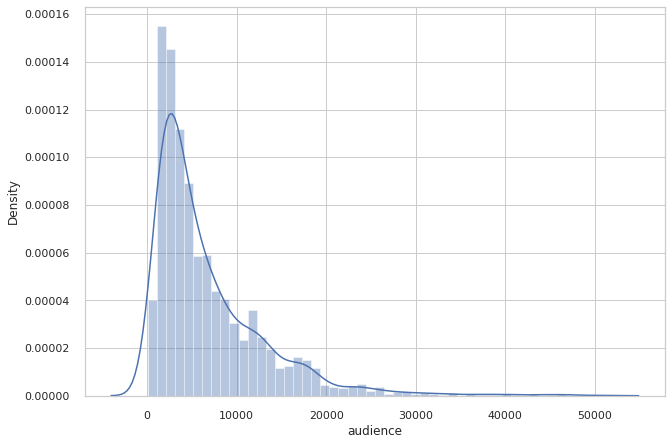

In [ ]:
#이상치 제거 전 그래프
sns.distplot(df_game['audience'], kde=True, rug=False)

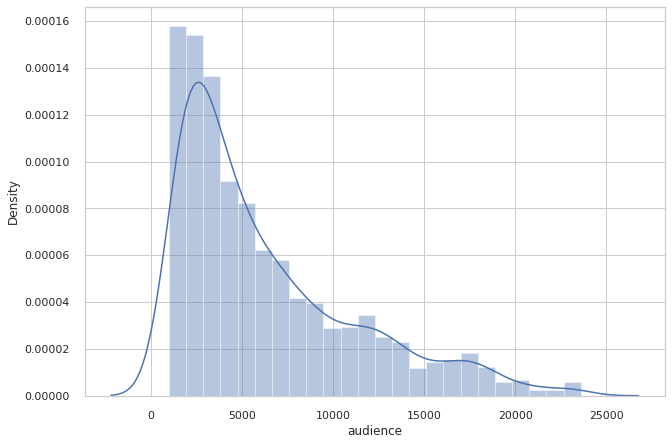

In [ ]:
#이상치 제거 후 그래프
df_game = df_game[(df_game['audience'] >= np.percentile(df_game['audience'], 2.5)) & 
        (df_game['audience'] <= np.percentile(df_game['audience'], 97.5))]

sns.distplot(df_game['audience'], kde=True, rug=False)

In [ ]:
df_game.shape

(2154, 16)

In [ ]:
pd.options.display.float_format = '{:.0f}'.format
df_game.sample(5)

,meet_year,game_date,yoil,game_time,home_team_name,away_team_name,game_type_name,audience,weekend,month,temperature,precipitation,wind_speed,humidity,last_year_avg_audience,last_year_rank
333,2012,2012-11-25,일,15:00,대전,광주,스플릿B,2906,1,11,3,1,1,70,14674,15
850,2014,2014-11-29,토,14:00,전남,인천,스플릿B,1568,1,11,13,0,2,75,2278,10
238,2012,2012-08-22,수,19:00,경남,부산,스플릿일반,989,0,8,24,99,2,88,10173,8
201,2012,2012-08-04,토,19:00,경남,대구,스플릿일반,1548,1,8,30,0,2,61,10173,8
1232,2016,2016-07-30,토,19:00,전북,광주,스플릿일반,16648,1,7,30,0,2,78,17414,1


## 모델링

### train_test_split

In [ ]:
# train set(70%), validation set(20%), test set(10%)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.3f}'.format

df = df_game

X = df.drop(columns=["audience","game_date"])
y = df["audience"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=None)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1507, 14)
y_train shape:  (1507,)
X_val shape:  (433, 14)
y_val shape:  (433,)
X_test shape:  (214, 14)
y_test shape:  (214,)


### 1. Baseline Model

mean:  6307.243268337976
median:  4613.0


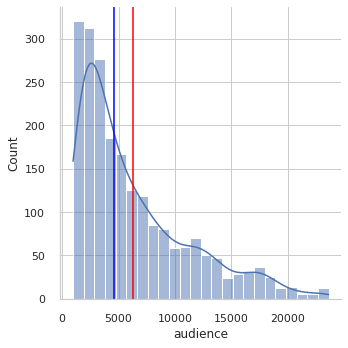

In [ ]:
#Baseline Graph
price_mean = y_train.mean()

## SalePrice probability density function
sns.displot(df['audience'], kde=True)

## draw mean value and median value on the graph
plt.axvline(df['audience'].mean(), color='red')
plt.axvline(df['audience'].median(), color='blue');
print("mean: ", df['audience'].mean())
print("median: ", df['audience'].median())

In [ ]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

audience_mean = y_train.mean()
y_pred_baseline = [audience_mean] * len(y_val)

mse = mean_squared_error(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,22464855.427
1,MAE,3949.656
2,RMSE,4739.710
3,R2,-0.007


### 2. Simple Linear Regression

,Metric,Score
0,MSE,14799165.093
1,MAE,2968.876
2,RMSE,3846.968
3,R2,0.337


y = 2455 + 0.5374x₁


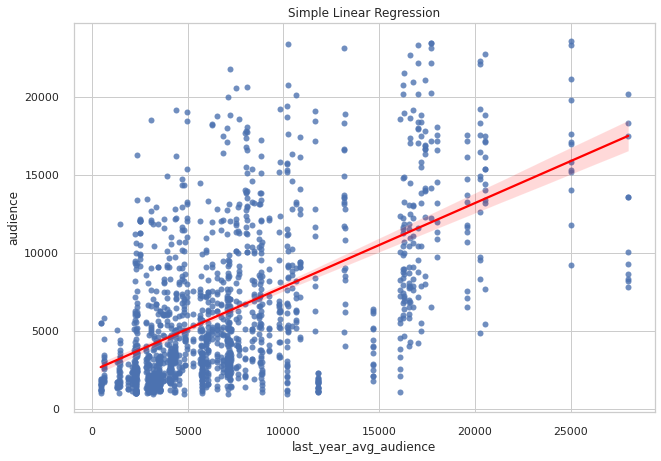

In [ ]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression

simple_linear_model = LinearRegression()

# Select features
features = ["last_year_avg_audience"]

X_train_slinear = X_train[features]
X_val_slinear = X_val[features]

# fit into multiple_linear_model
simple_linear_model.fit(X_train_slinear, y_train)

# validation set
y_pred_val_linear = simple_linear_model.predict(X_val_slinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_linear)
mae = mean_absolute_error(y_val, y_pred_val_linear)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_linear)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = simple_linear_model.intercept_
b1= float(simple_linear_model.coef_)

print(f'y = {b0:.0f} + {b1:.4f}x\u2081')

sns.regplot(x=X_train_slinear, y=y_train, line_kws={"color": "red"}).set_title('Simple Linear Regression');

### 3. Multiple Linear Regression

In [ ]:
# ordinal encoder and standard scaler
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## 원핫 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
ord_enc = OrdinalEncoder(handle_missing="value")
scaler = StandardScaler()

X_train_ord_enc = ord_enc.fit_transform(X_train)
X_val_ord_enc = ord_enc.transform(X_val)
X_test_ord_enc = ord_enc.transform(X_test)

#Ridge Regression 모델에 사용
X_train_scaled = scaler.fit_transform(X_train_ord_enc)
X_val_scaled = scaler.transform(X_val_ord_enc)
X_test_scaled = scaler.transform(X_test_ord_enc)

1 features
Selected names:  Index(['last_year_avg_audience'], dtype='object')
Test MAE: $2,969
Test R2: 0.3368363724462924 

2 features
Selected names:  Index(['last_year_avg_audience', 'last_year_rank'], dtype='object')
Test MAE: $2,875
Test R2: 0.36977304820711077 

3 features
Selected names:  Index(['weekend', 'last_year_avg_audience', 'last_year_rank'], dtype='object')
Test MAE: $2,754
Test R2: 0.41452378537813106 

4 features
Selected names:  Index(['yoil', 'weekend', 'last_year_avg_audience', 'last_year_rank'], dtype='object')
Test MAE: $2,746
Test R2: 0.4147405984370899 

5 features
Selected names:  Index(['yoil', 'game_time', 'weekend', 'last_year_avg_audience',
       'last_year_rank'],
      dtype='object')
Test MAE: $2,746
Test R2: 0.41470798506024276 

6 features
Selected names:  Index(['meet_year', 'yoil', 'game_time', 'weekend', 'last_year_avg_audience',
       'last_year_rank'],
      dtype='object')
Test MAE: $2,741
Test R2: 0.4198693480411996 

7 features
Selected name

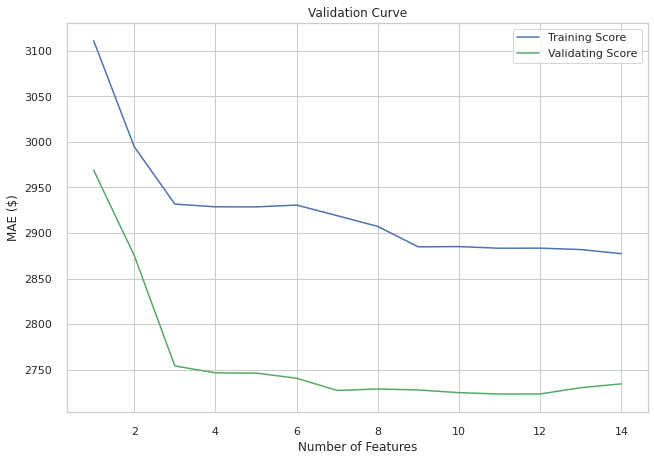

In [ ]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train_ord_enc.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train_ord_enc.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_ord_enc, y_train)
    X_val_selected = selector.transform(X_val_ord_enc)
    
    all_names = X_train_ord_enc.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label= "Validating Score", color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [ ]:
# Tunning hyperparameters and features for Multiple_linear_model

from sklearn.linear_model import LinearRegression
multiple_linear_model = LinearRegression()

# Select features
features = ['home_team_name', 'weekend', 'last_year_avg_audience','last_year_rank']

X_train_mlinear_new = X_train_ord_enc[features]
X_val_mlinear_new = X_val_ord_enc[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear_new, y_train)

# validation set
y_pred_val_mlinear_new = multiple_linear_model.predict(X_val_mlinear_new)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_mlinear_new)
mae = mean_absolute_error(y_val, y_pred_val_mlinear_new)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_mlinear_new)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2, b3, b4 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.1}x\u2081 + {b2:.1f}x\u2082 + {b3:.1f}x\u2083 + {b4:.1f}x\u2084')

,Metric,Score
0,MSE,13040383.525
1,MAE,2749.809
2,RMSE,3611.147
3,R2,0.416


y = 3638 + 2e+01x₁ + 2069.5x₂ + 0.4x₃ + -300.3x₄


### 4. Ridge Regression

Ridge Regression, alpha=0.001
Validation MAE: $2,735
Validation R2: 0.424


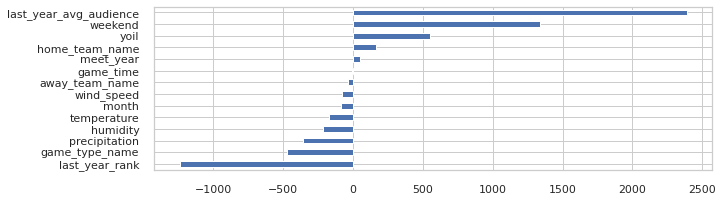

Ridge Regression, alpha=0.005
Validation MAE: $2,736
Validation R2: 0.424


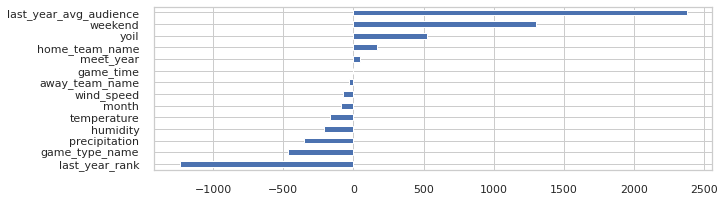

Ridge Regression, alpha=0.01
Validation MAE: $2,738
Validation R2: 0.425


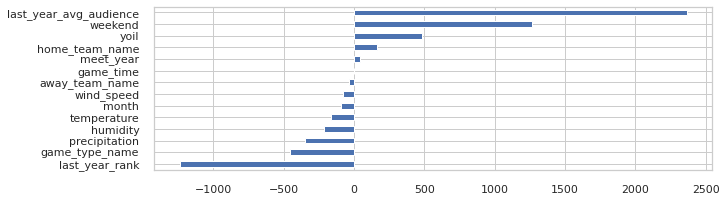

Ridge Regression, alpha=0.02
Validation MAE: $2,741
Validation R2: 0.425


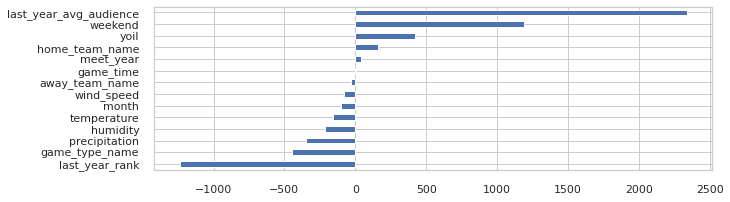

Ridge Regression, alpha=0.03
Validation MAE: $2,744
Validation R2: 0.425


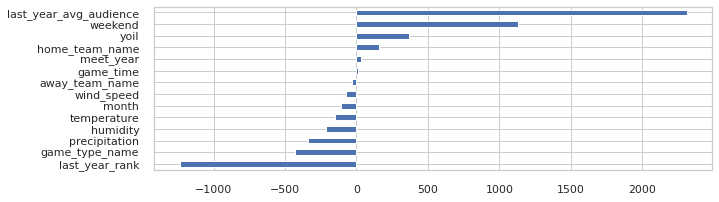

Ridge Regression, alpha=0.05
Validation MAE: $2,750
Validation R2: 0.425


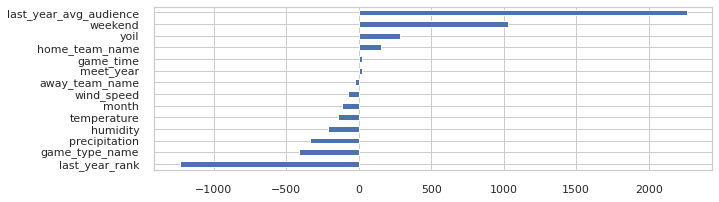

Ridge Regression, alpha=0.07
Validation MAE: $2,755
Validation R2: 0.424


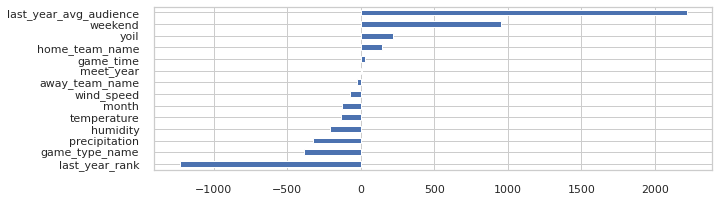

Ridge Regression, alpha=1.0
Validation MAE: $3,031
Validation R2: 0.359


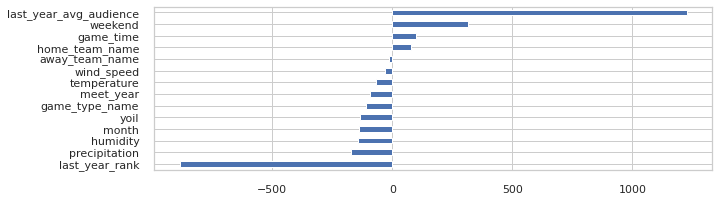

Ridge Regression, alpha=10.0
Validation MAE: $3,710
Validation R2: 0.103


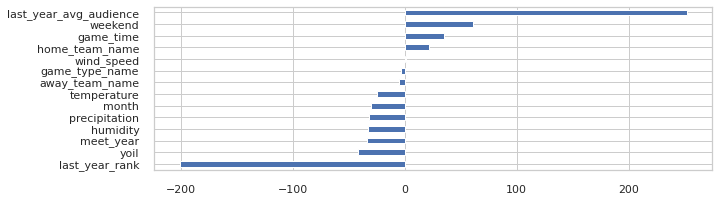

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 1.0, 10.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    Ridge_model = Ridge(alpha=alpha, normalize=True)  
    Ridge_model.fit(X_train_scaled, y_train)
    y_pred = Ridge_model.predict(X_val_scaled)

    # MAE for test
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f'Validation MAE: ${mae:,.0f}')
    print(f'Validation R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(Ridge_model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()


In [ ]:
#Best Ridge Model
Ridge_model = Ridge(alpha=0.02, normalize=True)  
Ridge_model.fit(X_train_scaled, y_train)
y_pred_val_Ridge = Ridge_model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred_val_Ridge)
mae = mean_absolute_error(y_val, y_pred_val_Ridge)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_Ridge)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,12838066.546
1,MAE,2740.740
2,RMSE,3583.025
3,R2,0.425


### 5. Random Forest

In [ ]:
# Check feature importances
# 랜덤포레스트에서는 학습 후에 특성들의 중요도 정보(Gini importance)를 기본으로 제공합니다. 
# 중요도는 노드들의 지니불순도(Gini impurity)를 가지고 계산하는데, 노드가 중요할 수록 불순도가 크게 감소한다는 사실을 이용합니다.
# 노드는 한 특성의 값을 기준으로 분리가 되기 때문에 불순도를 크게 감소하는데 많이 사용된 특성이 중요도가 올라갈 것입니다.

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(handle_missing="value"), 
    SimpleImputer(), 
    RandomForestRegressor(n_estimators=10, random_state=None, n_jobs=-1)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.5389304268253488


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from scipy.stats import randint, uniform

pipe = make_pipeline(
    # TargetEncoder(), 
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    # 'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    # 'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=15, 
    cv=2, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 2 folds for each of 15 candidates, totalling 30 fits


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 0.723346808307302, 'randomforestregressor__n_estimators': 476, 'simpleimputer__strategy': 'mean'}
MAE:  2408.003797957201


In [ ]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))
print('검증 정확도: ', pipe.score(X_val, y_val))

,Metric,Score
0,MSE,8639865.098
1,MAE,2149.008
2,RMSE,2939.365
3,R2,0.613


검증 정확도:  0.6128400322434644


## 특성 분석

### 1. Permutation Importance

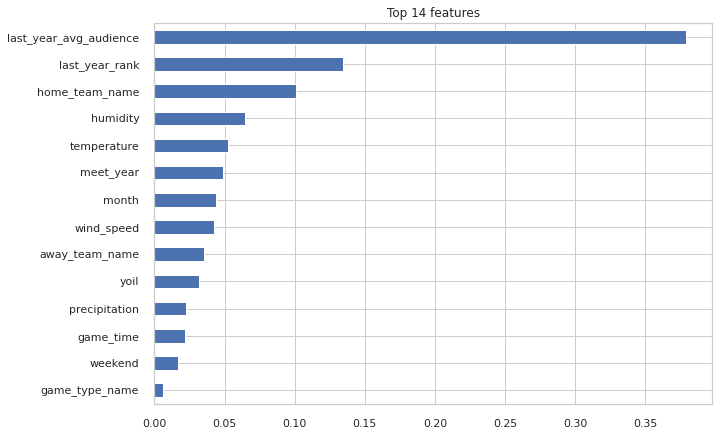

In [ ]:
# Feature Importances(Mean decrease impurity, MDI)

# sklearn 트리 기반 분류기에서 디폴트로 사용되는 특성 중요도는 속도는 빠르지만 결과를 주의해서 봐야 합니다. 
# 각각 특성을 모든 트리에 대해 평균불순도감소(mean decrease impurity)를 계산한 값입니다.

rf = pipe.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 14
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

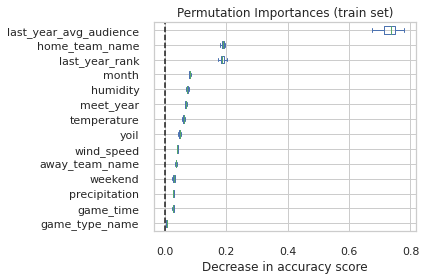

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_train_ord_enc, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 55.1 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5c4174ccafa795feb753dcc9602eaadd1de64cd8a67306c58951d7e6a12c4d37
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
# Permutation Importance, Mean Decrease Accuracy,MDA
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
import eli5
from eli5.sklearn import PermutationImportance

# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=2, n_jobs=-1)) 
])

pipe.fit(X_train, y_train)

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # regressor
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [ ]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

last_year_avg_audience   1592.973
home_team_name            370.115
meet_year                 224.455
last_year_rank            221.762
yoil                      108.538
humidity                   58.114
weekend                    56.488
wind_speed                 49.877
month                      49.227
away_team_name             48.900
game_type_name             22.271
precipitation              18.916
game_time                   7.738
temperature               -10.101
dtype: float64

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
1592.9732 ± 109.6051,last_year_avg_audience
370.1155 ± 61.3959,home_team_name
224.4553 ± 61.7237,meet_year
221.7616 ± 81.6042,last_year_rank
108.5380 ± 62.3809,yoil
58.1139 ± 69.8466,humidity
56.4878 ± 31.7782,weekend
49.8772 ± 9.7607,wind_speed
49.2269 ± 28.7844,month
48.8999 ± 18.7577,away_team_name


In [ ]:
X_train_transformed = pipe.named_steps['preprocessing'].transform(X_train)
model_final = pipe.named_steps['rf'].fit(X_train_transformed,y_train)

In [ ]:
#transformed train data convert to Dataframe
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_df.columns = X_train.columns
X_train_transformed_df.head()

,meet_year,yoil,game_time,home_team_name,away_team_name,game_type_name,weekend,month,temperature,precipitation,wind_speed,humidity,last_year_avg_audience,last_year_rank
0,2016.000,1.000,1.000,1.000,1.000,1.000,1.000,7.000,22.000,3.500,1.400,97.300,6279.400,7.000
1,2014.000,1.000,2.000,2.000,2.000,1.000,1.000,4.000,14.300,0.000,1.700,68.800,16607.400,4.000
2,2016.000,2.000,3.000,3.000,3.000,1.000,1.000,4.000,16.100,0.000,1.100,33.900,2988.800,13.000
3,2016.000,1.000,3.000,4.000,4.000,1.000,1.000,3.000,2.000,0.000,2.500,55.600,5664.200,5.000
4,2014.000,2.000,3.000,5.000,5.000,1.000,1.000,4.000,13.100,0.000,2.200,58.800,5960.900,11.000


### 2. Shap

In [ ]:
!pip install shap
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 93 kB/s 
     |████████████████████████████████| 37.8 MB 1.3 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=4eb3f2bb067fff188afad7fbf42b36fbb0b54ae934976f3e81a779f59923efbc
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=11152230 sha256=84babda9bc5400dc9467eb7c9a33d4a7d5e17ab44306247a4c5cf705f9ec24e1
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=98

In [ ]:
example1 = X_train_transformed_df.iloc[[10]]

# predict example1
model_final.predict(example1)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example1)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example1
)

In [ ]:
example2 = X_train_transformed_df.iloc[[100]]

# predict example1
model_final.predict(example2)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example2)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example2
)

In [ ]:
example3 = X_train_transformed_df.iloc[[1000]]

# predict example1
model_final.predict(example3)

import shap
explainer = shap.TreeExplainer(model_final)
shap_values = explainer.shap_values(example3)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=example3
)

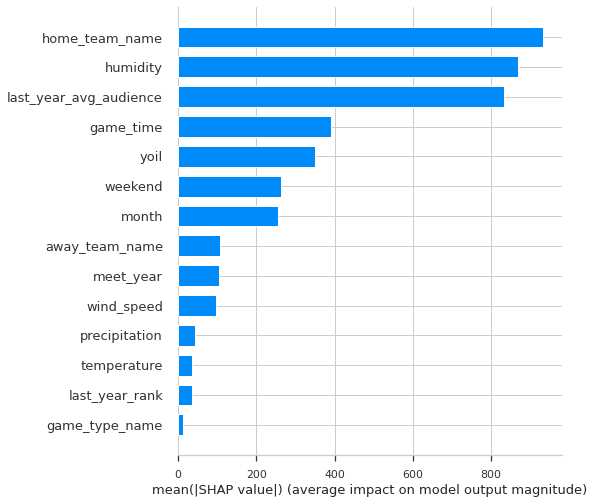

In [ ]:
shap.summary_plot(shap_values, X_train_transformed_df.iloc[:10000], plot_type="bar")

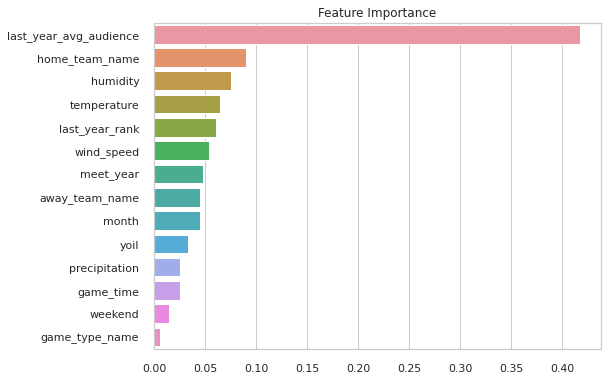

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 배열형태로 반환
ft_importance_values = model_final.feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top14 = ft_series.sort_values(ascending=False)[:14]

# 시각화
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
sns.barplot(x=ft_top14, y=ft_top14.index)
plt.show()

### 3. Rebuild RF model

In [ ]:
# eliminate useless features rebuild the model
features = ["yoil","game_time","precipitation","game_type_name"]
def feature_engineering(data):
  data = data.drop(columns=features)
  return data

X_train = feature_engineering(X_train)
X_val = feature_engineering(X_val)
X_test = feature_engineering(X_test)

In [ ]:
#New Random Forest Model
pipe = make_pipeline(
    TargetEncoder(), 
    # OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestRegressor(random_state=None)
)

dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], # int로 넣으면 error(bug)
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median'], 
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=40, 
    cv=3, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 15, 'randomforestregressor__max_features': 0.38865694545081586, 'randomforestregressor__n_estimators': 252, 'simpleimputer__strategy': 'mean', 'targetencoder__min_samples_leaf': 3, 'targetencoder__smoothing': 60.0}
MAE:  2311.371478389494


In [ ]:
# 만들어진 모델에서 가장 성능이 좋은 모델을 불러옵니다.
pipe = clf.best_estimator_

from sklearn.metrics import mean_absolute_error

y_pred_val_rf = pipe.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val_rf)
mae = mean_absolute_error(y_val, y_pred_val_rf)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_rf)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,7454247.829
1,MAE,2020.451
2,RMSE,2730.247
3,R2,0.666


## 최종 테스트 및 분석

### 1. Baseline Model Test

In [ ]:
# Test the baseline model
# get error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

audience_mean = y_train.mean()
y_pred_baseline = [audience_mean] * len(y_test)

mse = mean_squared_error(y_test, y_pred_baseline)
mae = mean_absolute_error(y_test, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,21567007.137
1,MAE,3844.825
2,RMSE,4644.029
3,R2,-0.037


### 2. RF Model Test

In [ ]:
#Test the final (best)model

y_pred_test_final = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test_final)
mae = mean_absolute_error(y_test, y_pred_test_final)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_test_final)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,7588474.417
1,MAE,1972.093
2,RMSE,2754.719
3,R2,0.635


In [ ]:
X_test.dtypes

meet_year                 float64
home_team_name             object
away_team_name             object
weekend                     int64
month                       int64
temperature               float64
wind_speed                float64
humidity                  float64
last_year_avg_audience    float64
last_year_rank              int64
dtype: object

In [ ]:
# ex) 인천 vs 서울 개막전 예상?
X_example = {'meet_year': 2023,
                'home_team_name': "인천",
                'away_team_name': "서울",
                'weekend': 1,
                'month': 2,
                'temperature': 10,
                'wind_speed': 1,
                'humidity': 67,
                'last_year_avg_audience' : 5261.5,
                'last_year_rank': 4
                }
X_example = pd.DataFrame(X_example, index=[0])
y_example = pipe.predict(X_example)
y_example[0]

6041.797193877552

In [ ]:
# ex) 인천 vs 김천 예상?
X_example = {'meet_year': 2023,
                'home_team_name': "인천",
                'away_team_name': "김천",
                'weekend': 1,
                'month': 2,
                'temperature': 20,
                'wind_speed': 1,
                'humidity': 67,
                'last_year_avg_audience' : 5261.5,
                'last_year_rank': 4
                }
X_example = pd.DataFrame(X_example, index=[0])
y_example = pipe.predict(X_example)
y_example[0]

5293.744058520843

In [ ]:
#Check Error Rate
df_error = pd.DataFrame({"y_test":y_test,"final_model":y_pred_test_final, "final_error(%)":None})
df_error["final_error(%)"] = (abs(df_error["y_test"] - df_error["final_model"])/df_error["y_test"])*100

df_error.head()

,y_test,final_model,final_error(%)
256,2317.000,3756.196,62.115
1014,4184.000,4278.787,2.265
490,5003.000,5512.463,10.183
830,1018.000,1710.156,67.992
1071,4479.000,6743.683,50.562


In [ ]:
df_error["final_error(%)"].describe()

count   214.000
mean     53.201
std      54.862
min       0.050
25%      15.629
50%      37.056
75%      67.024
max     301.793
Name: final_error(%), dtype: float64

### 메모